In [8]:
!pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/376.0 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 1.0/376.0 MB 3.1 MB/s eta 0:02:00
   ---------------------------------------- 1.8/376.0 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 2.6/376.0 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 3.4/376.0 MB 3.4 MB/s eta 0:01:52
   ---------------------------------------- 3.9/376.0 MB 3.3 MB/s eta 0:01:53
    --------------------------------------- 4.7/376.0 MB 3.3 MB/s eta 0:01:54
    --------------------------------------- 5.0/376.0 MB 3.3 MB/s eta 0:01:54
    --------------------------------------- 5.5/376.0 MB 3.0 MB/s eta 0:02:02
    --------------------------------------- 6.6/376.0 MB 3.1 MB/s eta 0:01:58
    --------------------------------------- 7.3/376.0 MB 3.2 MB/s eta 0:01:56
    --------------------------------------- 8.1/376.0 MB 3.3 MB/s eta 0

c:\Users\Sandra\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 2/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 3.0855e-04 - val_loss: 4.3911e-04
Epoch 3/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 2.6383e-04 - val_loss: 4.1467e-04
Epoch 4/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 2.2772e-04 - val_loss: 7.0560e-04
Epoch 5/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - loss: 1.9408e-04 - val_loss: 7.2464e-04
Epoch 6/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 1.9590e-04 - val_loss: 0.0011
Epoch 7/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 1.8336e-04 - val_loss: 2.1549e-04
Epoch 8/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 1.5159e-04 - val_loss: 2.7620e-04
Epoch 9/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 1.4827e-04 - val_loss: 2.2952e-04
Epoch 10/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 1.3337e-04 - val_loss: 2.7555e-04
Epoch 11/50
126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - l

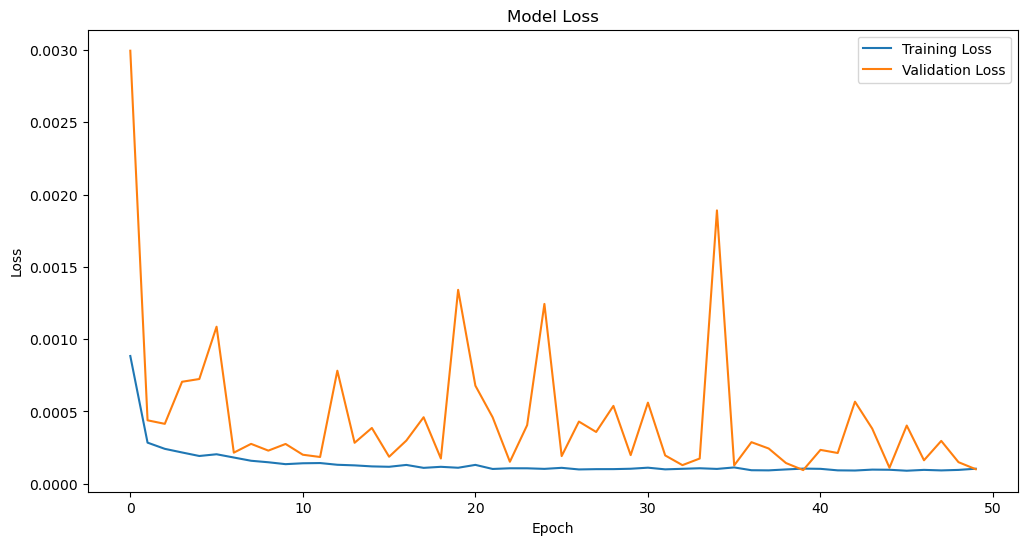

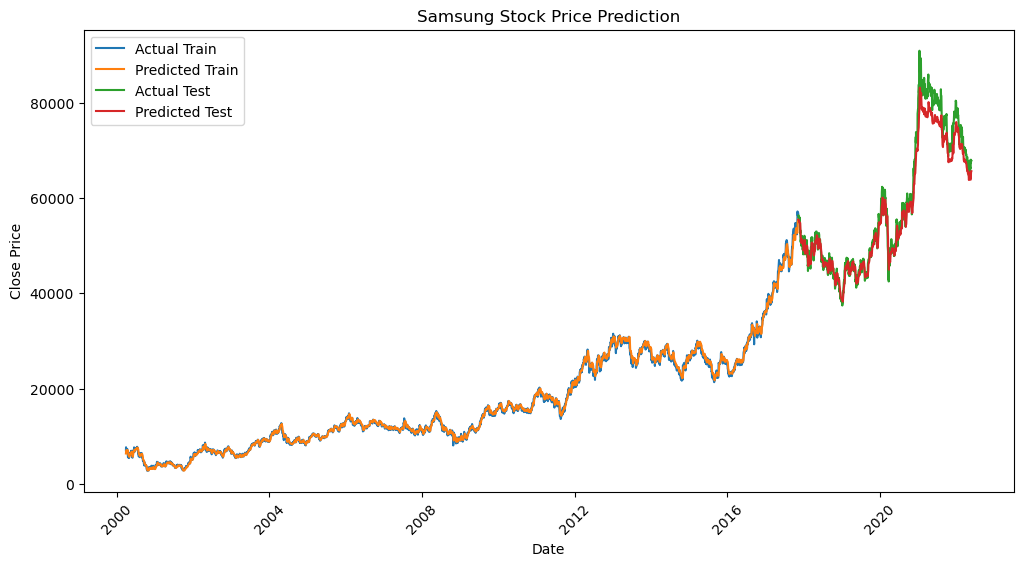

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted price for next day after 2022-05-23: 65750.70


In [ ]:
# Import necessary libraries
# explaining each part with comments
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


df = pd.read_csv(r"D:\Downloads\Samsung.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


close_prices = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences for LSTM
sequence_length = 60  # Number of time steps to look back
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:(i + sequence_length)])
    y.append(scaled_data[i + sequence_length])
X, y = np.array(X), np.array(y)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test)

train_rmse = np.sqrt(np.mean((train_predict - y_train_inv) ** 2))
test_rmse = np.sqrt(np.mean((test_predict - y_test_inv) ** 2))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(df.index[sequence_length:train_size + sequence_length], y_train_inv, label='Actual Train')
plt.plot(df.index[sequence_length:train_size + sequence_length], train_predict, label='Predicted Train')
plt.plot(df.index[train_size + sequence_length:], y_test_inv, label='Actual Test')
plt.plot(df.index[train_size + sequence_length:], test_predict, label='Predicted Test')
plt.title('Samsung Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()


last_sequence = scaled_data[-sequence_length:]
last_sequence = last_sequence.reshape((1, sequence_length, 1))
next_day_pred = model.predict(last_sequence)
next_day_price = scaler.inverse_transform(next_day_pred)[0][0]
print(f'Predicted price for next day after {df.index[-1].date()}: {next_day_price:.2f}')